In [27]:
# useful libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
url = 'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv'

# Loading data in dataframe
df = pd.read_csv(url)
# print the values

print(df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy   
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No  \
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [28]:
# Conversion of all columns to numeric
df = df.apply(pd.to_numeric, errors='ignore')

print(df.describe())

               Age      Cluster
count  1453.000000  1453.000000
mean     44.604955     0.821060
std      14.221178     0.842842
min      18.000000     0.000000
25%      33.000000     0.000000
50%      45.000000     1.000000
75%      57.000000     2.000000
max      71.000000     2.000000


In [5]:
print(df.columns.values)
print(df.shape)
print(df.head(3))

['yummy' 'convenient' 'spicy' 'fattening' 'greasy' 'fast' 'cheap' 'tasty'
 'expensive' 'healthy' 'disgusting' 'Like' 'Age' 'VisitFrequency' 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy   
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No  \
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [6]:
mcd = df.iloc[:, 0:11]
mcd = (mcd == "Yes").astype(int)

In [7]:
print(round(np.mean(mcd, axis=0), 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [8]:
print(mcd.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive   
0      0           1      0          1       0     1      1      0          1  \
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
3        0           1  
4        1           0  


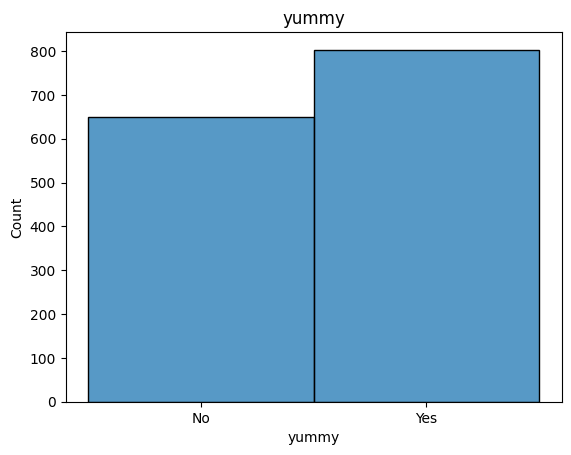

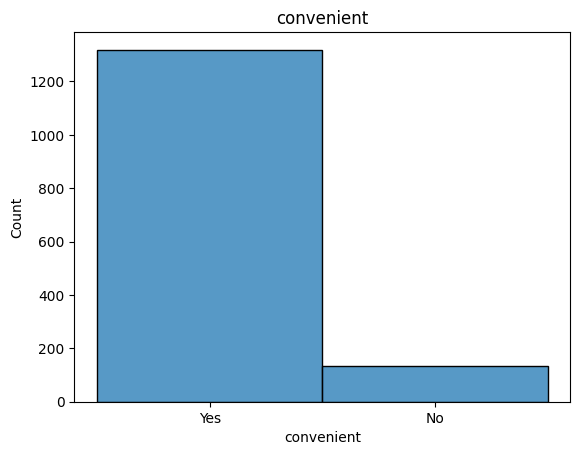

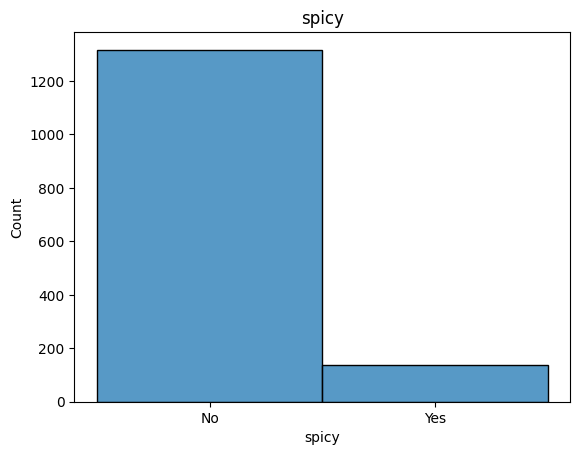

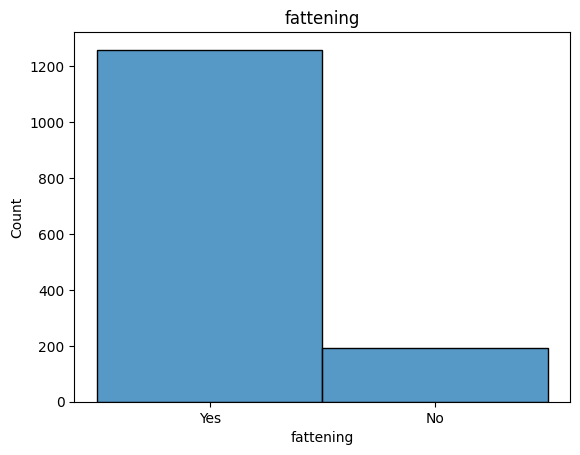

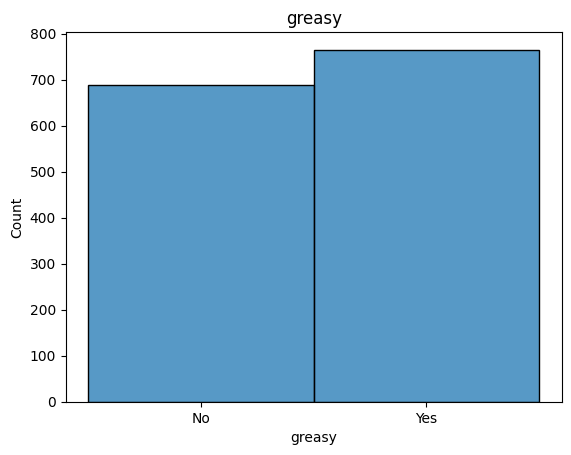

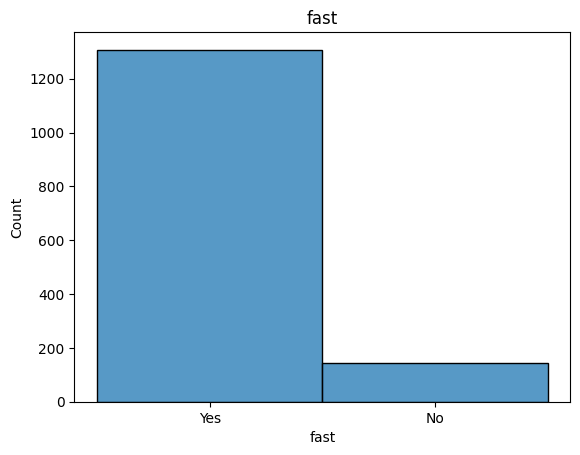

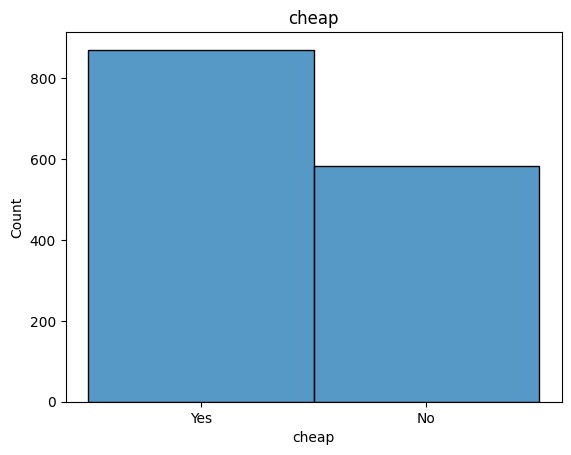

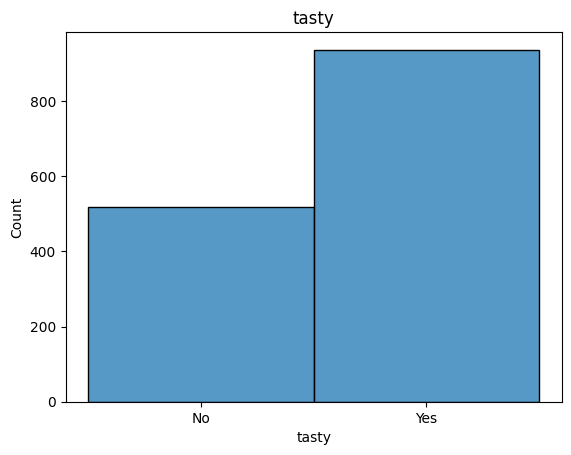

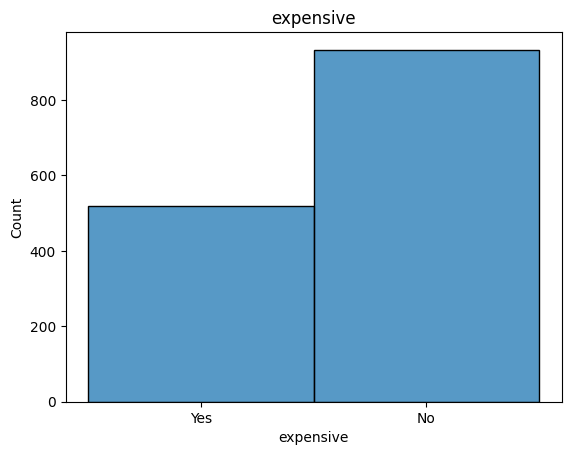

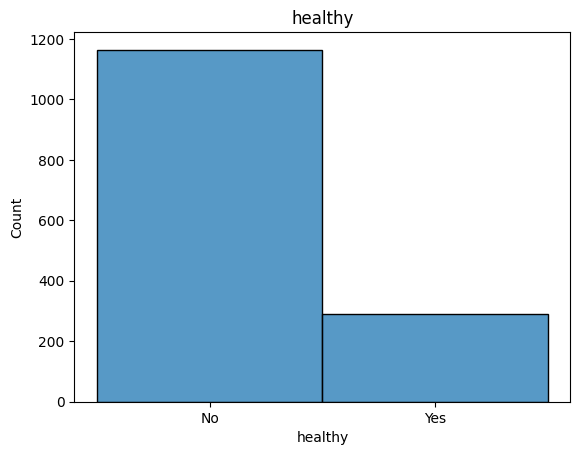

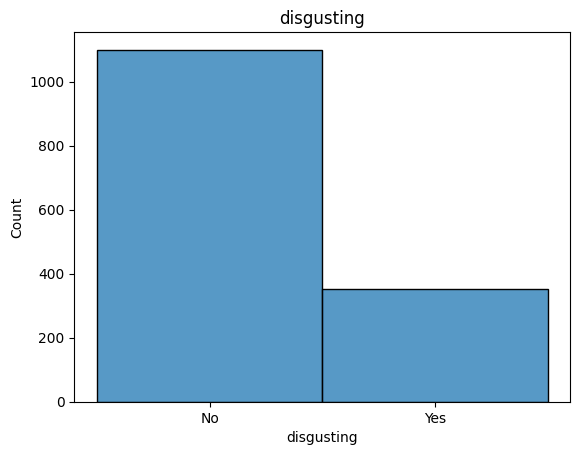

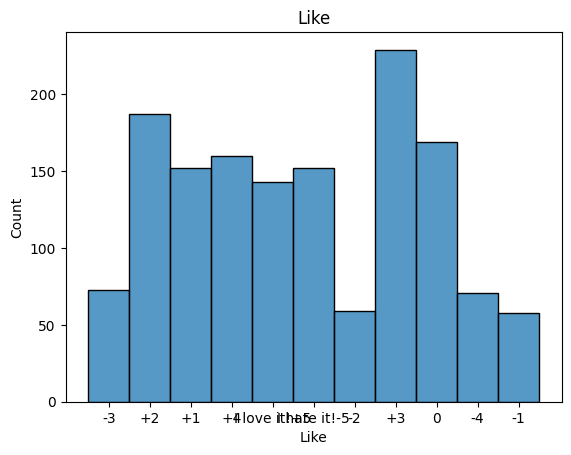

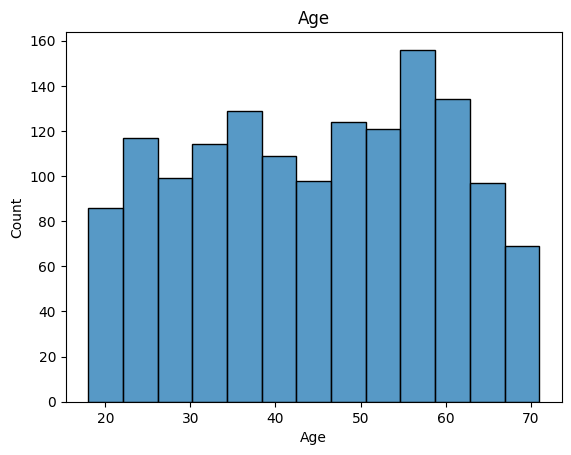

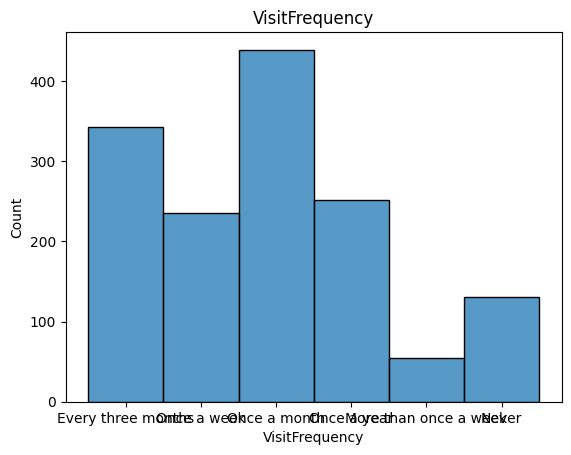

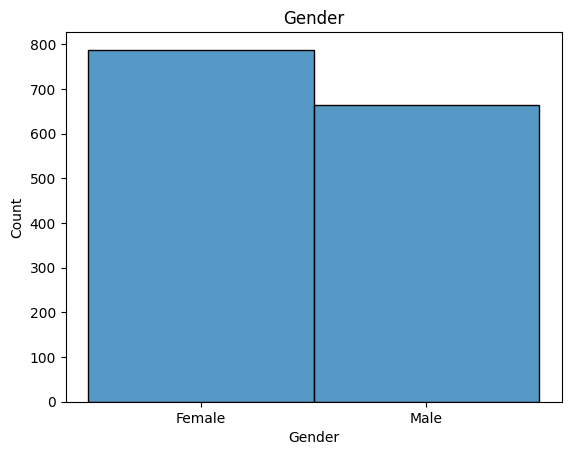

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt

# Plot distribution
for col in df.columns:
    sb.histplot(df[col], kde=False)
    plt.title(col)
    plt.show()

In [10]:
# percentage of customers who found each attribute to be true
attribute_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for col in attribute_cols:
    count = df[col].value_counts()
    pct = count / len(df) * 100
    print(f"Percentage of customers who found {col} to be true: ")
    print(pct)
    print("\n")

Percentage of customers who found yummy to be true: 
yummy
Yes    55.264969
No     44.735031
Name: count, dtype: float64


Percentage of customers who found convenient to be true: 
convenient
Yes    90.777701
No      9.222299
Name: count, dtype: float64


Percentage of customers who found spicy to be true: 
spicy
No     90.640055
Yes     9.359945
Name: count, dtype: float64


Percentage of customers who found fattening to be true: 
fattening
Yes    86.717137
No     13.282863
Name: count, dtype: float64


Percentage of customers who found greasy to be true: 
greasy
Yes    52.64969
No     47.35031
Name: count, dtype: float64


Percentage of customers who found fast to be true: 
fast
Yes    90.020647
No      9.979353
Name: count, dtype: float64


Percentage of customers who found cheap to be true: 
cheap
Yes    59.876118
No     40.123882
Name: count, dtype: float64


Percentage of customers who found tasty to be true: 
tasty
Yes    64.418445
No     35.581555
Name: count, dtype: float64




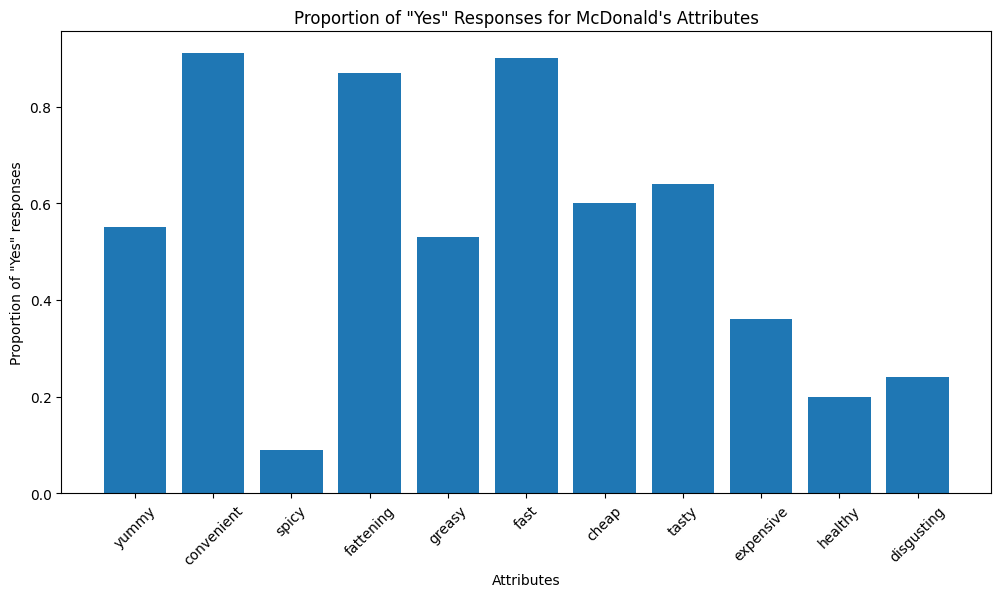

In [11]:
import matplotlib.pyplot as plt

# Define the data
labels = mcd.columns.values
values = round(np.mean(mcd, axis=0), 2)

# Create the bar chart
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(labels, values)

# Add labels and title
ax.set_xlabel('Attributes')
ax.set_ylabel('Proportion of "Yes" responses')
ax.set_title('Proportion of "Yes" Responses for McDonald\'s Attributes')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [12]:
scaler = StandardScaler()
df_std = scaler.fit_transform(mcd)

In [13]:
# Calculate sum of squared distances for each value of k
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    ssd.append(kmeans.inertia_)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

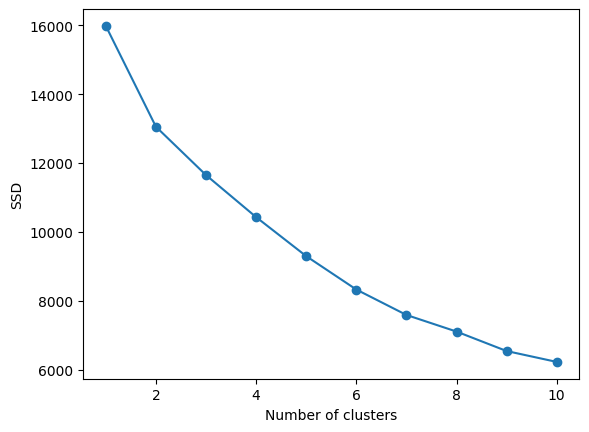

In [14]:
# Plot elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_std)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

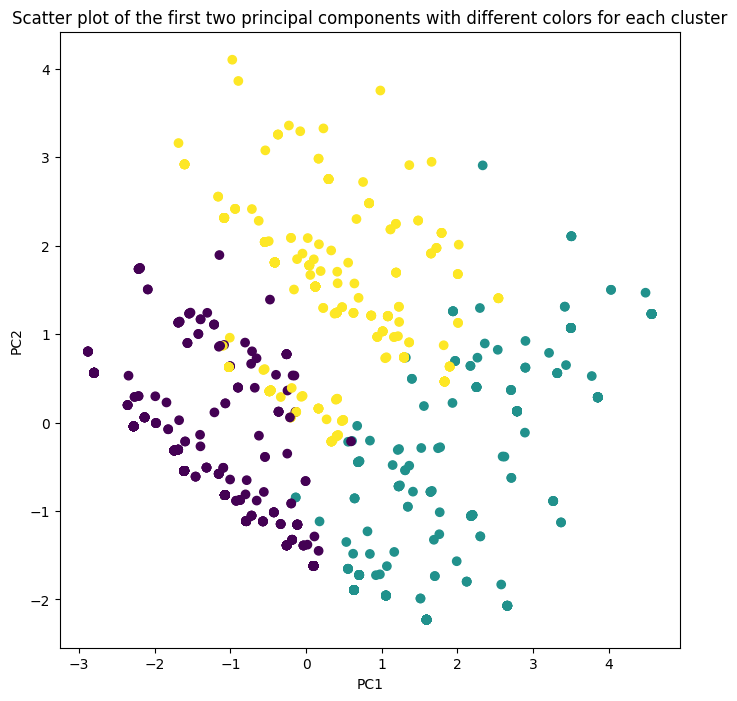

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to the standardized data
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_std)

# Plot scatter plot of the first two principal components with different colors for each cluster
plt.figure(figsize=(8, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of the first two principal components with different colors for each cluster')
plt.show()

In [18]:
df['Cluster'] = kmeans.labels_
#Calculate mean values for each variable by cluster
cluster_means = df.groupby('Cluster').mean()
#Print mean values by cluster
print(cluster_means)

TypeError: Could not convert YesNoYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesNoYesNoYesNoYesYesYesNoNoYesYesYesYesYesNoYesNoYesYesYesYesNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesYesNoYesYesYesNoNoNoYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesNoYesYesNoYesYesYesNoNoNoYesYesYesYesYesYesNoYesNoYesNoYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesNoYesYesYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesNoNoYesNoYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoNoYesYesNoYesYesNoNoYesNoNoYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesNoNoYesNoYesYesYesYesYesYesNoYesNoYesNoYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesNoYesYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesNoNoYesNoNoNoYesNoNoNoYesYesYesNoYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesNoYesNoYesNoNoYesYesYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesNoYesYesYesYesYesNoNoNoYesNoYesYesNoNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoNoYesYesYesYesYesNoNoYesYesNoNoYesNoNoYesNoYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesYesYes to numeric

In [19]:
segment_names = {
0: 'Burger Lovers',
1: 'Healthy Eaters',
2: 'Chicken Lovers'
}

In [20]:
#Add segment names to original data
df['Segment'] = df['Cluster'].map(segment_names)

In [21]:
segment_counts = df['Segment'].value_counts()

In [22]:
#Print the number of consumers in each segment
print(segment_counts)

Segment
Burger Lovers     669
Chicken Lovers    409
Healthy Eaters    375
Name: count, dtype: int64


<Axes: xlabel='Segment', ylabel='count'>

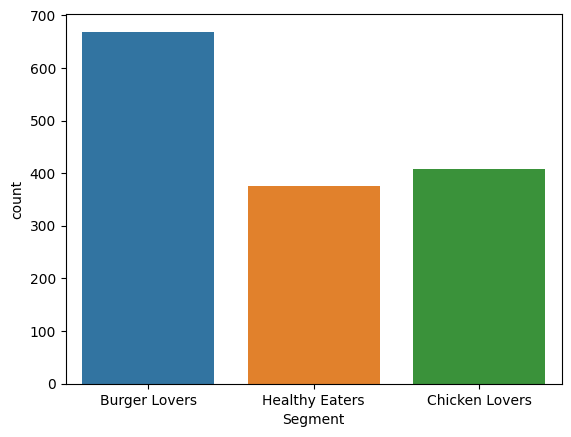

In [23]:
#Visualize the distribution of consumers across the segments
import seaborn as sns
sns.countplot(x='Segment', data=df, order=segment_names.values())

In [24]:
segment_means = df.groupby('Segment').mean()
print(segment_means)

TypeError: Could not convert YesNoYesYesNoYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesNoYesNoYesNoYesYesYesNoNoYesYesYesYesYesNoYesNoYesYesYesYesNoYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesYesNoYesYesYesNoNoNoYesYesYesYesNoNoYesYesNoYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesNoNoYesYesNoYesYesYesYesYesNoYesYesNoYesYesYesNoNoNoYesYesYesYesYesYesNoYesNoYesNoYesNoYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesNoYesNoYesNoYesNoYesYesYesYesYesYesYesNoYesYesNoNoYesYesYesYesYesYesNoYesYesYesYesNoYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesNoYesNoNoYesNoYesYesYesYesYesNoYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoNoYesYesNoYesYesNoNoYesNoNoYesNoYesYesNoYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesNoNoYesNoYesYesYesYesYesYesNoYesNoYesNoYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoYesYesYesNoYesYesNoNoNoYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesNoYesYesNoYesYesYesYesYesYesNoYesYesYesYesYesNoNoYesNoNoNoYesNoNoNoYesYesYesNoYesYesYesYesYesYesYesNoYesNoYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesNoYesNoYesNoNoYesYesYesNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesNoNoYesYesYesYesYesYesYesNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesYesYesNoNoYesYesYesYesYesNoYesYesYesYesYesNoNoNoYesNoYesYesNoNoYesYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesYesYesYesYesNoNoYesYesYesNoNoYesYesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYesYesYesNoNoYesYesYesYesYesNoNoYesYesNoNoYesNoNoYesNoYesNoYesYesYesYesNoYesYesYesYesYesYesYesYesNoYesYesNoYesYesYesYesYesYesYesNoYesYesYes to numeric

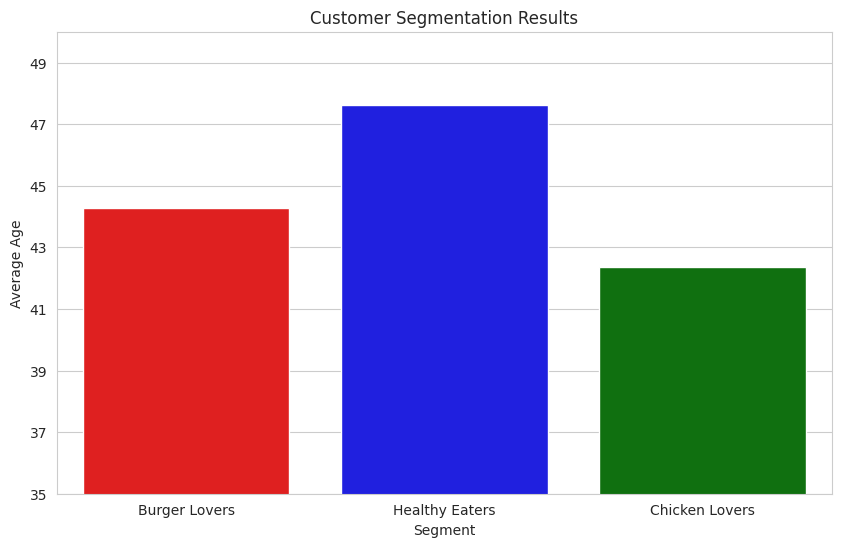

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Set up data
segments = ['Burger Lovers', 'Healthy Eaters', 'Chicken Lovers']
ages = [44.272048, 47.632000, 42.374083]
colors = {'Burger Lovers': 'red', 'Healthy Eaters': 'blue', 'Chicken Lovers': 'green'}



# Create barplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=segments, y=ages, palette=colors, ax=ax)


# Set axis labels and title
ax.set_xlabel('Segment')
ax.set_ylabel('Average Age')
ax.set_title('Customer Segmentation Results')

# Set y-axis limits and ticks
ax.set_ylim([35, 50])
ax.set_yticks(range(35, 51, 2))

plt.show()

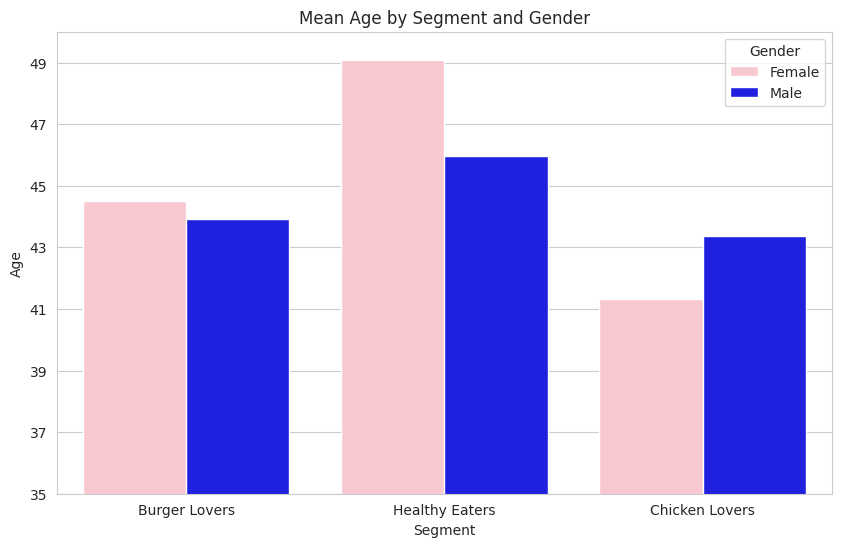

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Set up data
cluster_means = df.groupby(['Cluster', 'Gender'])['Age'].mean().reset_index()
segments = ['Burger Lovers', 'Healthy Eaters', 'Chicken Lovers']
colors = {'Male': 'blue', 'Female': 'pink'}

# Plot the mean age for each segment by gender (male and female)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=cluster_means, x='Cluster', y='Age', hue='Gender', palette=colors, ax=ax)
plt.title('Mean Age by Segment and Gender')

# Set x-axis labels to segment names
ax.set_xticklabels(segments)
ax.set_xlabel('Segment')

# Set y-axis limits and ticks
ax.set_ylim([35, 50])
ax.set_yticks(range(35, 51, 2))

plt.show()